## Gradient Descent
**Gradient Descent** is algorithm helps to minimize a function i.e it finds the minimum value of a function i.e the value at local minima. 
At first the gradient descent algorithm is given a initial set of parameters for a particular function defined by some set parameters. It then **iteratively** moves towards a set of parameter values that minimize the function.**Iterative** minimization is achieved using calculus, taking steps in the **negative** direction of the functions gradient. 

## Linear Regression
**Linear regression** helps us to find out linear relationships in a given data set i.e it figures out a line which best fits the data.
The standard equation for a line in a Cartesian XY plane is given by $y = mx + b$ where m is the slope of line and b is the y-intercept.
To find the best line that fits our data we need to **optimize** the values of m and b.

Number of Data Points:1020


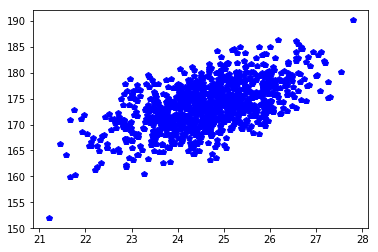

In [31]:
% pylab inline
## Load the data
def read_data():
    data_file = open("india_foot_height.dat","r")
    raw_data = data_file.readlines()
    data_file.close()
    return [line.strip().split("  ") for line in raw_data]

## Store the data for further functions
fh_data = read_data()
print("Number of Data Points:{}".format(len(fh_data)))
## Plot the data
plot([x[0] for x in fh_data],[x[1] for x in fh_data],'ro',color='blue',marker='p')

### Error Function
The standard way of finding the best line is to define a error function that calculates the error for a given values of m & b for all the points. By this way the error function measures how good a line is for a set of m & b. A popular error function is the squared error function which is defined as 
$$ E = \frac{1}{N}\sum_{i=0}^N(t_i - (mx_i + b) )^2 $$
The error distance is **squared** to ensure that the error remains positive for all x & the error function is differentiable. The better fitted lines result lower values of error function

In [32]:
def error(b,m):
    totalError = 0
    for point in fh_data:
        x = float(point[0])
        y = float(point[1])
        totalError += (y - m*x - b)**2
    return totalError/float(len(fh_data))

The X & Y axes represent the corresponding m & b values & the Z axis gives the corresponding error value. Starting from some where in the plot the gradient descent algorithm moves downhill to search for the optimal value of m & b. With each iteration it will **update** the b & m values to a line which gives lower error rates

### Running Gradient Descent
To run gradient descent on the error function, first we need to compute the gradient. As the error function $E(m,b)$ is a function of two variables the corresponding gradients are 
$$ \frac{\partial E}{\partial m} = \frac{2}{N}(t_i - mx_i - b)(-x) \ \ ,\ \frac{\partial E}{\partial b} = \frac{2}{N}(t_i - mx_i - b)(-1)$$
The gradient descent algorithm uses values of these two functions to calculate the step value & the direction to move


In [33]:
def step_gradient(current_b,current_m):
    de_dm = 0
    de_db = 0
    N = float(len(fh_data))
    for point in fh_data:
        x = float(point[0])
        t = float(point[1])
        de_dm += (-2/N)*(t - current_m * x + current_b)*(x)
        de_db += (-2/N)*(t - current_m * x + current_b)
    new_b = current_b - de_db*learning_rate
    new_m = current_m - de_dm*learning_rate
    
    return [new_b,new_m]

#### Learning Rate
The Learning Rate variable determines how large step we should take downhill during each iteration. A long step may step over the minimum & a very small rate will take longer time to finish

In [34]:
learning_rate = 0.0001
iterations = 1000
# Define Some Variables For Plotting
errors = []
b_values = []
m_values = []

In [35]:
def gradient_descent(i_b,i_m):
    b = i_b
    m = i_m
    for i in range(iterations):
        b,m = step_gradient(b,m)
        errors.append(error(b,m))
        b_values.append(b)
        m_values.append(m)
    return [b,m]

In [36]:
def run():
    initial_b = 0
    initial_m = 0
    print("Initial m:{} & initial b:{}".format(initial_m,initial_b))
    plot([x[0] for x in fh_data],[x[1] for x in fh_data],'ro',color='red')
    
    print("Initial Error:{}".format(error(initial_b,initial_m)))
    [b,m] = gradient_descent(initial_b,initial_m)
    print("After {} iterations, final b: {},final m:{}".format(iterations,b,m))
    print("Final Error: {}".format(error(b,m)))
    plot([x for x in range(22,29)],[(m*x + b) for x in range(22,29)],color='blue')
    return [b,m]

Initial m:0 & initial b:0
Initial Error:30189.0928471
After 1000 iterations, final b: 0.327586088887,final m:7.05683845685
Final Error: 37.484904175


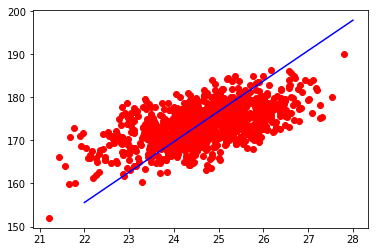

In [37]:
[b,m] = run()

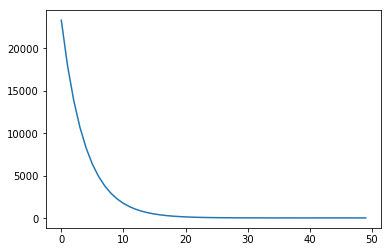

In [38]:
# Lets Plot Error Vs Iteration
len(errors)
plot(errors[:50])

In [39]:
def find_my_height(shoesize):
    """
    Input: Shoesize in cm
    Output: Height in cm
    """
    return (m*shoesize + b)

In [40]:
find_my_height(23) 

162.6348705963926

Use this chart to convert shoe size to cm
![http://www.activityshelter.com/wp-content/uploads/2016/06/mens-shoe-size-chart-countries.jpg](http://www.activityshelter.com/wp-content/uploads/2016/06/mens-shoe-size-chart-countries.jpg)

## Credits##
Thanks to Siraj ,Joydeep Mukherjee
& MATT https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/